In [36]:
import numpy as np
import tqdm
import time
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Vyhovují nejhorší případy očekávané závislosti?
Závisí střední hodnota výpočetní závislosti na sadě instancí? Jestliže ano, proč?

Oba algoritmy naprogramujte. Výpočetní složitost (čas) je nejspolehlivější a nejjednodušší měřit počtem navštívených konfigurací, to jest vyhodnocených sestav věcí v batohu. Na obou sadách pozorujte závislost výpočetního času na n, pro n v rozsahu, jaký je Vaše výpočetní platforma schopna zvládnout, a to jak maximální, tak průměrný čas. Pro alespoň jednu hodnotu n (volte instance velikosti alespoň 10) zjistěte četnosti jednotlivých hodnot (histogram) a pokuste se jej vysvětlit.
Ohledně metody větví a hranic - uvědomte si, že se jedná o rozhodovací problém a podle toho ořezávejte. Nápověda: i když je to rozhodovací problém, lze použít ořezávání podle ceny. Jak? Implementované způsoby ořezávání popište ve zprávě.
Sady NR a ZR vyhodnocujte zvlášť a proveďte jejich srovnání (stačí diskuze).


In [77]:
df = pd.read_csv("results.csv")

def r2label(val):
    if val == "set()":
        return "none"
    if val == "{'residuals'}":
        return "residuals"
    if val == "{'weight'}":
        return "weight"
    if val == "{'weight', 'residuals'}":
        return "both"
    raise ValueError(val)

df["optimizations"] = df.optimizations.apply(r2label)
sdf = df[df.itype=="NR"].copy()
zdf = df[df.itype=="ZR"].copy()

In [93]:
hue_order=["none", "residuals", "weight", "both"]

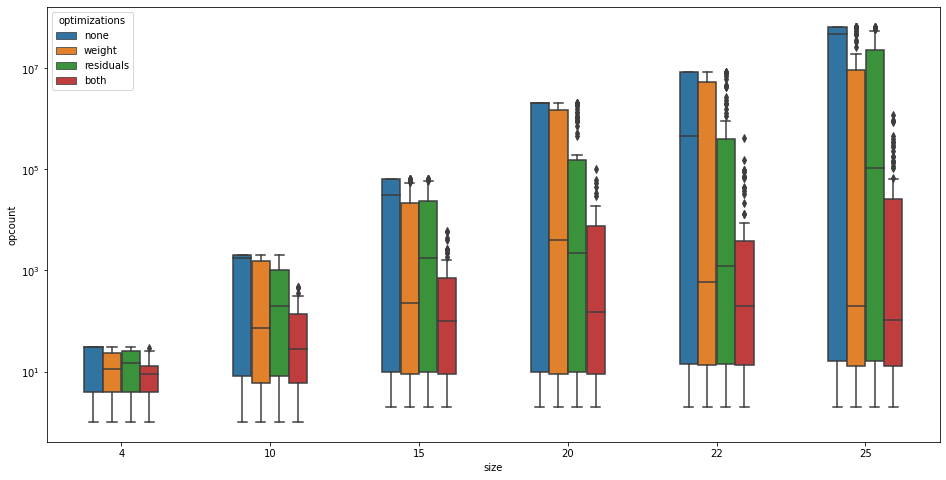

In [99]:
fig, ax = plt.subplots(figsize=(16, 8))
ax = sns.boxplot(x="size", y="opcount", data=sdf, hue="optimizations", width=0.5, hue_order=hue_order)
ax.set_yscale('log')

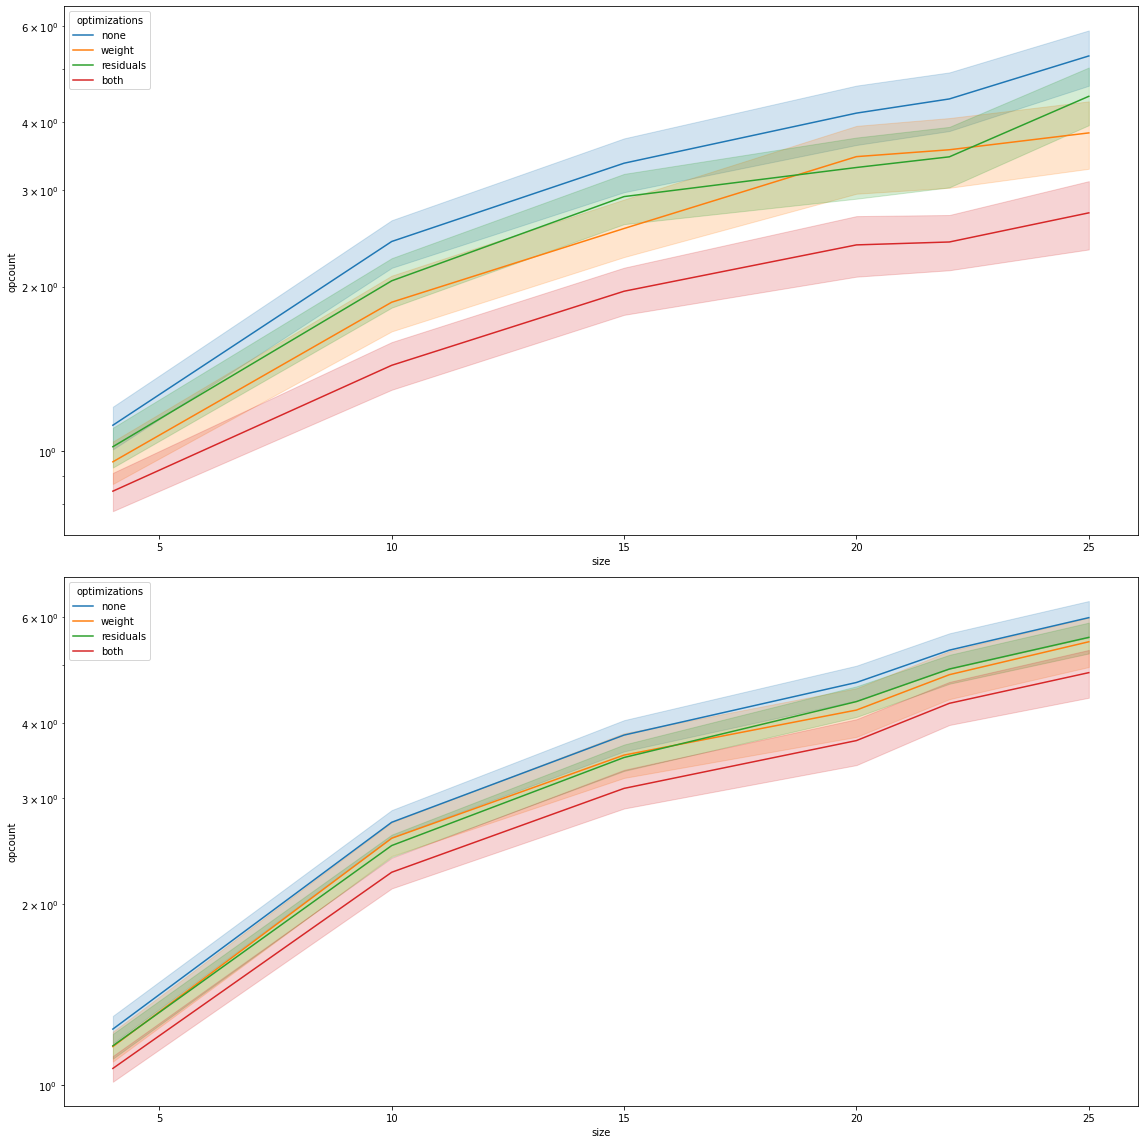

In [123]:
fig, ax = plt.subplots(figsize=(16, 16), nrows=2)
ax[0].set_yscale('log')
sns.lineplot(x="size", y="opcount", data=sdf, hue="optimizations", hue_order=hue_order, ax=ax[0])
ax[1].set_yscale('log')
sns.lineplot(x="size", y="opcount", data=zdf, hue="optimizations", hue_order=hue_order, ax=ax[1])
plt.tight_layout()
plt.show()

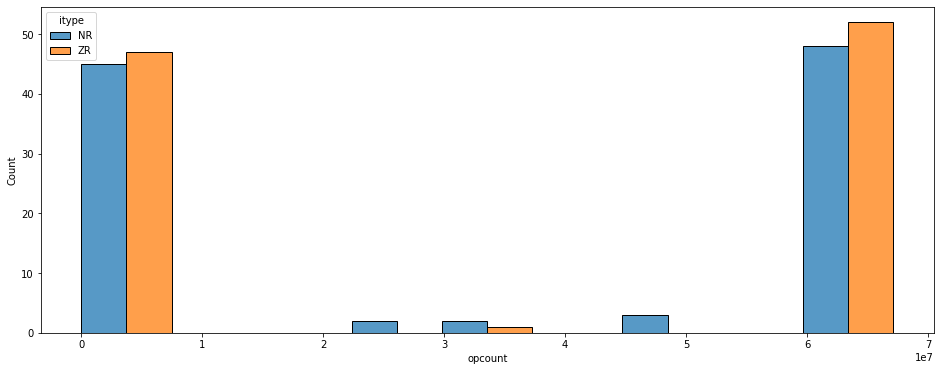

In [154]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.histplot(data=df[(df["size"]==25) & (df.optimizations=="none")], x="opcount", element="bars", ax=ax, hue="itype", multiple="dodge")
plt.show()

<AxesSubplot:xlabel='opcount', ylabel='Count'>

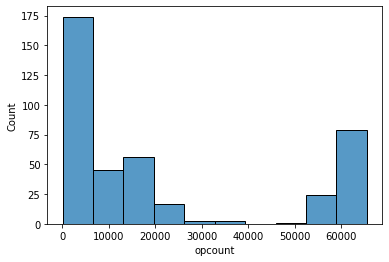

In [82]:
sns.histplot(data=zdf[zdf["size"]==15], x="opcount")